# Day 4, 데이터로 탐험을 떠나요!
## Day 3 마지막 부분에서 소개해드린 EDA를 진행해주세요.

  1. 여러분이 선호하는 데이터셋을 선정해주세요
  2. 이 데이터셋에 대한 여러 가설을 세워주세요.
  3. 가설을 증명하기 위한 여러 데이터 분석 / 시각화를 진행해주세요.

## 모바일 폰 데이터
https://www.kaggle.com/iabhishekofficial/mobile-price-classification
 ### 가설
   1. 화면크기가 커지면 배터리 용량이 커질것이다.
   2. 코어클럭은 코어수에 반비례하고 코어클럭과 코어수는 가격에 비례한다.
   3. 해상도가 높아지면 가격이 높아진다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
### 데이터 불러오기

mobile_df = pd.read_csv("./train.csv")

## Column

 1. 배터리 용량
 2. 블루투스 유무
 3. 코어 클럭
 4. 듀얼심 지원 유무
 5. 전면카메라 화소(백만)
 6. 4G 탑재 유무
 7. 저장소 용량(기가)
 8. 모바일 폰 두께(cm)
 9. 모바일 폰 무게
 10. 프로세서 코어 수
 11. 기본 카메라 화소(백만)
 12. 세로 해상도
 13. 가로 해상도
 14. 메모리 용량
 15. 화면 길이
 16. 화면 넓이
 17. 한번 충전으로 쓸 수 있는 배터리 시간
 18. 3G 유무
 19. 터치스크린 유무
 20. Wi-Fi 유무
 21. 가격 범위(0: 저비용, 1 : 중비용, 2 : 고비용, 3 : 매우 높은 비용)

In [4]:
## 사용하지 않을 Column 제외
mobile_df = mobile_df.drop(['blue', 'dual_sim', 'fc', 'four_g', 'm_dep', 'pc','three_g', 'wifi'], axis = 1)

mobile_df

,battery_power,clock_speed,int_memory,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,price_range
0,842,2.2,7,188,2,20,756,2549,9,7,19,0,1
1,1021,0.5,53,136,3,905,1988,2631,17,3,7,1,2
2,563,0.5,41,145,5,1263,1716,2603,11,2,9,1,2
3,615,2.5,10,131,6,1216,1786,2769,16,8,11,0,2
4,1821,1.2,44,141,2,1208,1212,1411,8,2,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,2,106,6,1222,1890,668,13,4,19,1,0
1996,1965,2.6,39,187,4,915,1965,2032,11,10,16,1,2
1997,1911,0.9,36,108,8,868,1632,3057,9,1,5,1,3
1998,1512,0.9,46,145,5,336,670,869,18,10,19,1,0


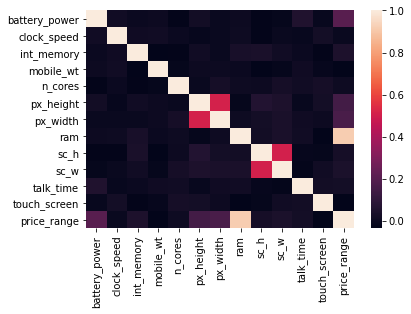

In [5]:
sns.heatmap(mobile_df.corr())
plt.show()

### heatmap 상으로 각 column간의 상관이 낮아 보임

## 가설 1. 화면크기가 커지면 배터리 용량이 커질것이다.

In [6]:
## 화면크기 = sc_h + sc_w
## 크기는 h * w이지만 절대적인 크기를 구하는게 아닌 상대적인 수치가 필요하기 때문에 숫자를 작게하기 위해 더하기 사용
## 1 X 1 = 1  , 1+1 = 2같은 특수한 상황이 없다는것을 전제로함

mobile_df['SC'] = mobile_df['sc_h'] + mobile_df['sc_w']

mobile_df## h * w 하여 새로운 column SC 추가

,battery_power,clock_speed,int_memory,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,price_range,SC
0,842,2.2,7,188,2,20,756,2549,9,7,19,0,1,16
1,1021,0.5,53,136,3,905,1988,2631,17,3,7,1,2,20
2,563,0.5,41,145,5,1263,1716,2603,11,2,9,1,2,13
3,615,2.5,10,131,6,1216,1786,2769,16,8,11,0,2,24
4,1821,1.2,44,141,2,1208,1212,1411,8,2,15,1,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,2,106,6,1222,1890,668,13,4,19,1,0,17
1996,1965,2.6,39,187,4,915,1965,2032,11,10,16,1,2,21
1997,1911,0.9,36,108,8,868,1632,3057,9,1,5,1,3,10
1998,1512,0.9,46,145,5,336,670,869,18,10,19,1,0,28


Text(0, 0.5, 'battery power')

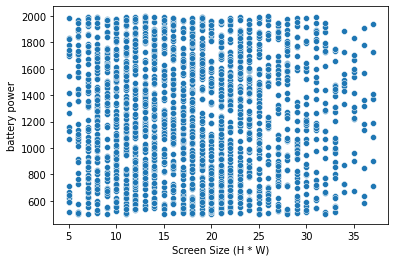

In [7]:
sns.scatterplot(x = mobile_df['SC'],y = mobile_df['battery_power'])

plt.xlabel("Screen Size (H * W)")
plt.ylabel("battery power")

x가 증가함에따라 y가 증감하는 모습을 볼 수 없음으로 양, 음의 상관관계가 없다.

## 가설 2. 코어클럭은 코어수에 반비례하고 코어클럭과 코어수는 가격에 비례한다.

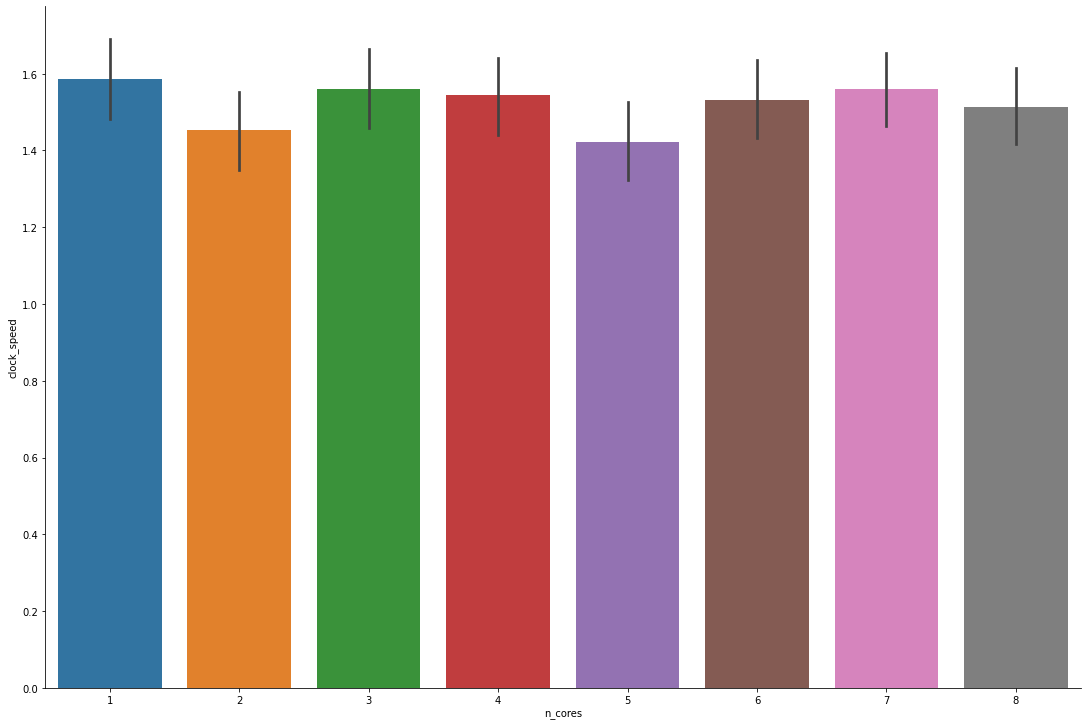

In [10]:
sns.catplot(x ='n_cores', y = 'clock_speed', kind = "bar", data = mobile_df, height = 10, aspect = 15/10)
plt.show()

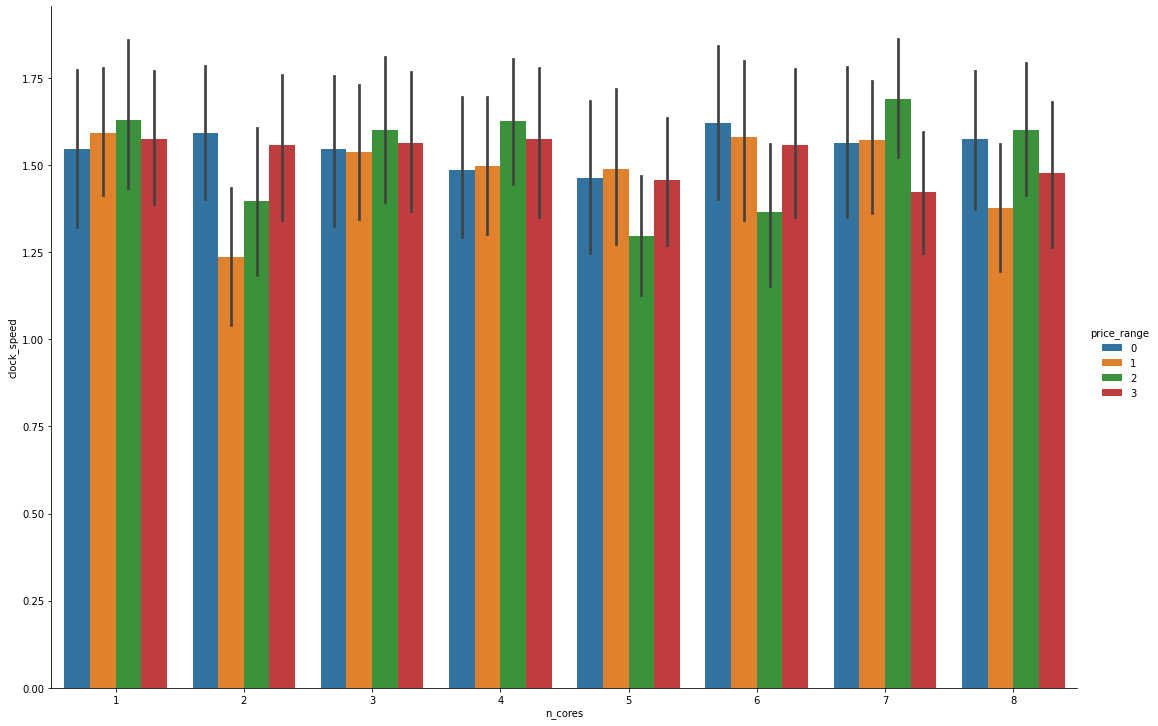

In [11]:
sns.catplot(x ='n_cores', y = 'clock_speed', hue = 'price_range', kind = "bar", data = mobile_df, height = 10, aspect = 15/10)
plt.show()

## ???! 분명하게 상관이 있을거라 생각했던 자료에서 상관관계를 찾을수 없었다.
 
 ### 가격에 변동을 주는 변수는 하나가 아닌 복합적이다.
   - 다른 변수와 합치는 등 복합적인 자료가 필요함
   - 가설3 또한 비슷한 답이 나올 것 같음
   
 ### 가설 4. 가격에 크게 영향을 주는 변수는 `코어수`, `터치스크린 유무`, `메모리 용량`, `저장소 크기`
 
  - 같은 기종이라도 가격의 차이를 만드는 요소라 생각되는 메모리 용량, 저장소 크기
  - 기종별 급 나누기라 생각되는 코어수
  - 모바일 폰의 구조적인 차이의 기준을 터치스크린 유무로 생각
  - 각 항목에 가중치를 두어 종합적인 score를 만들어 가격과의 상관관계를 찾아봅시다.
  - 터치스크린 유무는 0,1 로 표현되므로 값을 변경할 필요가 있을 것 같음

In [13]:
mobile_df['Score'] =  ((mobile_df['ram'] + mobile_df['int_memory']) * mobile_df['n_cores']) * (mobile_df['touch_screen'] + 1)

mobile_df['Score']

0        5112
1       16104
2       26440
3       16674
4        5820
        ...  
1995     8040
1996    16568
1997    49488
1998     9150
1999    47568
Name: Score, Length: 2000, dtype: int64

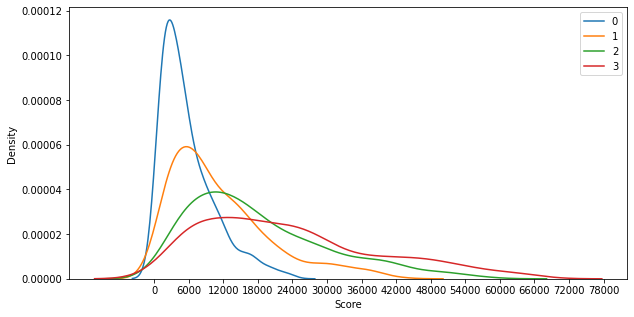

In [27]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.kdeplot(x = mobile_df[mobile_df.price_range == 0]['Score'], ax = ax)
sns.kdeplot(x = mobile_df[mobile_df.price_range == 1]['Score'], ax = ax)
sns.kdeplot(x = mobile_df[mobile_df.price_range == 2]['Score'], ax = ax)
sns.kdeplot(x = mobile_df[mobile_df.price_range == 3]['Score'], ax = ax)

plt.xticks([i for i in range(0, 80000, 6000)])

plt.legend(['0', '1', '2', '3'])

plt.show()

In [17]:
mobile_df[mobile_df['price_range'] == 0]['Score'].mean()

5825.356

In [18]:
mobile_df[mobile_df['price_range'] == 1]['Score'].mean()

11361.982

In [19]:
mobile_df[mobile_df['price_range'] == 2]['Score'].mean()

18022.748

In [20]:
mobile_df[mobile_df['price_range'] == 3]['Score'].mean()

23416.808

### price_range가 높아질수록 Score의 평균이 증가 하는 것을 찾을 수 있었다.

  - 코어수, 터치스크린 유무, 메모리 용량, 저장소 크기는 가격대와 양의 상관관계가 있다.